<a href="https://colab.research.google.com/github/joaoxfernando/estudo-spreads/blob/main/Spread_ITSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ferramenta para calculo de Spread entre pares de ações

## Importando os módulos

In [1]:
!pip install yfinance
!pip install kaleido
import pandas as pd
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.0
    Uninstalling lxml-4.9.0:
      Successfully uninstalled lxml-4.9.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.4 MB/s eta 0:00:00


In [2]:
# definindo os pares que vamos utilizar.
par_itausa = ['ITSA3.SA', 'ITSA4.SA']

# definindo data inicial e final para pesquisar cotações - formato deve ser: ANO-MES-DIA
data_inicial = '2022-01-01'
data_final = '2022-12-14'

## Pegando os dados de cada par e jogando em seu respectivo dataframe

In [3]:
itsa3 = yf.Ticker(par_itausa[0])
df_itsa3 = itsa3.history(start=data_inicial, end=data_final)
itsa4 = yf.Ticker(par_itausa[1])
df_itsa4 = itsa4.history(start=data_inicial, end=data_final)

In [4]:
columns_name = ['Abertura', 'Alta', 'Baixa', 'Fechamento', 'Volume', 'Dividendos', 'Desdobramentos']
df_itsa3.columns = columns_name
df_itsa3.reset_index(inplace=True)
df_itsa3.drop(['Alta', 'Baixa', 'Volume', 'Dividendos', 'Desdobramentos'], axis=1, inplace=True)
display(df_itsa3)

,Date,Abertura,Fechamento
0,2022-01-03 00:00:00-03:00,7.897967,7.796166
1,2022-01-04 00:00:00-03:00,7.804649,7.838582
2,2022-01-05 00:00:00-03:00,7.957350,7.830101
3,2022-01-06 00:00:00-03:00,7.830101,7.804650
4,2022-01-07 00:00:00-03:00,7.804649,7.991282
...,...,...,...
234,2022-12-07 00:00:00-03:00,8.754706,8.813463
235,2022-12-08 00:00:00-03:00,8.813464,8.764500
236,2022-12-09 00:00:00-03:00,8.880000,8.680000
237,2022-12-12 00:00:00-03:00,8.680000,8.630000


In [5]:
df_itsa4.columns = columns_name
df_itsa4.reset_index(inplace=True)
df_itsa4.drop(['Alta', 'Baixa', 'Volume', 'Dividendos', 'Desdobramentos'], axis=1, inplace=True)
display(df_itsa4)

,Date,Abertura,Fechamento
0,2022-01-03 00:00:00-03:00,7.635642,7.635642
1,2022-01-04 00:00:00-03:00,7.644106,7.694898
2,2022-01-05 00:00:00-03:00,7.661036,7.610244
3,2022-01-06 00:00:00-03:00,7.601780,7.677967
4,2022-01-07 00:00:00-03:00,7.677968,7.771086
...,...,...,...
234,2022-12-07 00:00:00-03:00,8.448517,8.419181
235,2022-12-08 00:00:00-03:00,8.389846,8.184500
236,2022-12-09 00:00:00-03:00,8.230000,8.170000
237,2022-12-12 00:00:00-03:00,8.160000,8.110000


## Unindo os dois DataFrames em um novo

In [6]:
df_itsa = pd.merge(df_itsa3, df_itsa4, how = 'left', on = 'Date')
final_columns = ['Data', 'Abertura ITSA3', 'Fechamento ITSA3', 'Abertura ITSA4', 'Fechamento ITSA4']
df_itsa.columns = final_columns
def sub(a,b):
  return b-a

df_itsa['Diferença Abertura'] = df_itsa.apply(lambda f: sub(f['Abertura ITSA4'], f['Abertura ITSA3']), axis=1)
df_itsa['Diferença Fechamento'] = df_itsa.apply(lambda f: sub(f['Fechamento ITSA4'], f['Fechamento ITSA3']), axis=1)
df_itsa

,Data,Abertura ITSA3,Fechamento ITSA3,Abertura ITSA4,Fechamento ITSA4,Diferença Abertura,Diferença Fechamento
0,2022-01-03 00:00:00-03:00,7.897967,7.796166,7.635642,7.635642,0.262325,0.160525
1,2022-01-04 00:00:00-03:00,7.804649,7.838582,7.644106,7.694898,0.160543,0.143684
2,2022-01-05 00:00:00-03:00,7.957350,7.830101,7.661036,7.610244,0.296315,0.219857
3,2022-01-06 00:00:00-03:00,7.830101,7.804650,7.601780,7.677967,0.228321,0.126684
4,2022-01-07 00:00:00-03:00,7.804649,7.991282,7.677968,7.771086,0.126681,0.220196
...,...,...,...,...,...,...,...
234,2022-12-07 00:00:00-03:00,8.754706,8.813463,8.448517,8.419181,0.306190,0.394282
235,2022-12-08 00:00:00-03:00,8.813464,8.764500,8.389846,8.184500,0.423618,0.580000
236,2022-12-09 00:00:00-03:00,8.880000,8.680000,8.230000,8.170000,0.650001,0.510000
237,2022-12-12 00:00:00-03:00,8.680000,8.630000,8.160000,8.110000,0.520000,0.520000


### Exportando os dados para uma planilha do excel.

In [7]:
# !pip install openpyxl
# import openpyxl
# with pd.ExcelWriter('spread-itsa.xlsx') as writer:
#   df_itsa3.to_excel(writer, sheet_name='ITSA3')
#   df_itsa4.to_excel(writer, sheet_name='ITSA4')
#   df_itsa.to_excel(writer, sheet_name='SPREAD')

## *Plotando os gráficos*

### Gráfico com o matplotlib

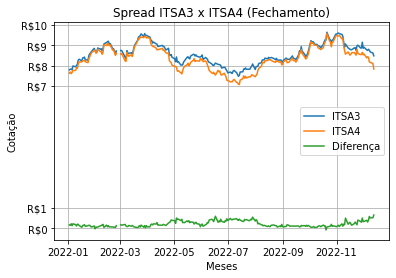

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


dados_x = df_itsa[['Data']]
dados_x.set_index('Data')
# dados_y = df_itsa[['Fechamento ITSA3']], df_itsa[['Fechamento ITSA4']], df_itsa[['Diferença Fechamento']]
dados_y = df_itsa
dados_y = dados_y.drop(['Data', 'Abertura ITSA3', 'Abertura ITSA4', 'Diferença Abertura'], axis=1)
dados_y.set_index('Fechamento ITSA3')
dados_diff = dados_y['Diferença Fechamento']
dados_diff = pd.DataFrame(dados_diff)
dados_diff.set_index('Diferença Fechamento')
plt.plot(dados_x, dados_y)

plt.legend(['ITSA3', 'ITSA4', 'Diferença'])
plt.title('Spread ITSA3 x ITSA4 (Fechamento)')
plt.xlabel('Meses')
plt.ylabel('Cotação')
plt.yticks([0,1,7, 8, 9,10], ['R$0', 'R$1', 'R$7', 'R$8', 'R$9', 'R$10'])
# datas = ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05','2022-06','2022-07']
# plt.xticks(datasf, ['Jan','Fev', 'Mar','Abr','Mai','Jun','Jul'])
plt.figure.dpi=100
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = (25, 5.5)
plt.rcParams["legend.loc"] = 'center left'
plt.grid()
plt.savefig('ITSA.png', dpi=250)
plt.savefig('ITSA.pdf', dpi=250)
plt.show()

### Gráficos com o Plotly

In [9]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Scatter(x=df_itsa['Data'],y=df_itsa['Fechamento ITSA3'], name='ITSA3',
    line_shape='spline'),
    secondary_y= False,
)
fig.add_trace(
    go.Scatter(x=df_itsa['Data'],y=df_itsa['Fechamento ITSA4'], name='ITSA4',
               line_shape='spline'),
    secondary_y= False,
)
fig.add_trace(
    go.Scatter(x=df_itsa['Data'],y=df_itsa['Diferença Fechamento'], name='Diferença',
               line_shape='spline'),
    secondary_y= False,
)
fig.update_xaxes(title_text="Mês (2022)")
fig.update_yaxes(title_text="Cotação")

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,7, 8,9,10,11],
        ticktext = ['R$ 0', 'R$ 1', 'R$ 7,00','R$ 8', 'R$ 9', 'R$ 10', 'R$ 11']
    )
)

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07','2022-08', '2022-09','2022-10','2022-11','2022-12'],
        ticktext = ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho','Agostto','Setembro','Outubro','Novembro','Dezembro']
    )
)
fig.update_traces(textposition="bottom right")
fig.update_traces(connectgaps=True)
fig.show()

In [10]:
diff = px.line(x=df_itsa['Data'], y=df_itsa['Diferença Fechamento'], line_shape='spline',
               labels={'y': 'Diferença Cotação (R$)', 'x': 'Mês (2022)'})
diff.update_traces(connectgaps=True)

diff.add_trace(go.Scatter(
        hovertemplate = 'Price: %{y:$.2f}<extra></extra>',
))
diff.update_traces(hovertemplate='Data: %{x} <br>Diferença Cotação: R$ %{y:.2f}') #

diff.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0,0.5,1],
        ticktext = ['R$ 0', 'R$ 0,50', 'R$ 1']
    ),
    xaxis = dict(
        tickmode = 'array',
        tickvals = ['2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
        ticktext = ['Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Roboto",
    )
)

diff.show()